In [77]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Intro to Classification and kNN
Week 4 | Lesson 2.1




### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Define and give examples of classification
- Explain the kNN algorithm
- Build a K-Nearest Neighbors model


<a name="opening"></a>
## Opening (5 mins)

We've been doing regression, which is predicting to a continuous value. Now let's learn some techniques for classification: predicting to class values.

> Check: what is a scenario where you would use classification? Can you convert a regression problem into a classification one?




<a name="introduction"></a>
## Introduction: Topic (10 mins)

Classification is a supervised learning technique in machine learning of assigning a classification for new instances of data from already observed past data whose classification is known. 

For example, we might build a machine learning model to detect spam emails. The model would analyze the emails' content and classify them as either "spam" or "legitimate" emails.

![](http://i.giphy.com/iQbUZdceDtKRG.gif)

Many classification problems can boil down to a binary problem like this.

Binary classification is the simplest form of classification, though classification problems can certainly deal with multiple class labels.

There are a number of different classification techniques, including k-Nearest Neighbors, which is this morning's topic.

#### K-Nearest Neighbors (kNN)

The K-Nearest Neighbors (kNN) classification algorithm is one of the simplest. It is based on proximity to known data points with known classifications. It is surprisingly powerful, and can learn complex decision boundaries.

![](http://i.giphy.com/3orieYYLakrjOsQ77i.gif)

A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function.

> Check: will it matter what we choose for K? If so, how do we choose?


As a very general rule of thumb, a large K value is more precise as it reduces the overall noise, but there is no guarantee.

Cross-validation is another way to retrospectively determine a good K value by using an independent dataset to validate the K value. Typically, the optimal K for most datasets is between 3-10. That produces much better results than 1NN.  But this is by no means a blanket rule.



<a name="demo"></a>
## Demo: kNN, conceptually (20 mins)

Here is some pseudo-code to demonstrate how kNN works:

```python
procedure KNN(x)
  begin
    looping through all known data points in training data, find the closest k points to x
    assign f(x) = majority classification among the k closest points
  end
```



Consider the following data concerning credit default. Age and Loan are two numerical variables (predictors) and Default is the target.


<img src="./assets/images/graph1.png" width="700" />



We can now use the training set to classify an unknown case (Age = 48, Loan = $142,000) using Euclidean distance.

If we have two points **p** and **q** where:
$$p = (p_1, p_2)$$ $$q = (q_1, q_2)$$

$$\sqrt{(q_1-p_1)^2 + (q_2-p_2)^2}$$

> Check: what's the classification with K = 4?

<img src="./assets/images/loans.png" width="600" height="200" />


With K=4, there are three Default=Y and one Default=N out of four closest neighbors. The prediction for the unknown case is  Default=Y.

> Check: is this consistent to the graph?  Why might it not be?  What should we do about that?


Scale matters!

Let's look at an extreme example...
We're trying to predict who will be admitted to college based on two tests; one is scored 0-5, the other 0-100.  They are equally difficult!

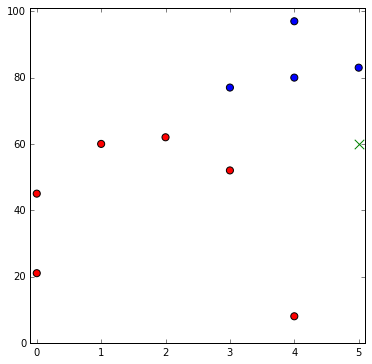

In [76]:
quiz1 = [5, 3, 1, 4, 0, 4, 0, 2, 3, 4]
quiz2 = [83, 52, 60, 80, 21, 97, 45, 62, 77,  8]
admit = [1,0,0,1,0,1,0,0,1,0]
admit_col = ["r" if x==0 else "b" for x in admit]
new_point =[5,60]
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(quiz1,quiz2, c=admit_col, s=50)
ax.scatter(new_point[0], new_point[1],marker="x", s=90, c='g')
ax.set_xlim(-0.1,5.1)
ax.set_ylim(0,101);

Using two nearest neighbours, looks like the student is in!  But if we actually calculated the Euclidean distances (without any kind of rescaling), it would look more like this...

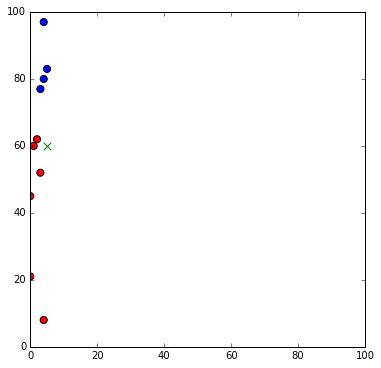

In [75]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(quiz1,quiz2,c=admit_col, s=50)
ax.scatter(5,60,marker="x", s=60, c='g')
ax.set_xlim(0,100)
ax.set_ylim(0,100);

<a name="ind-practice"></a>
## Independent Practice: Build a simple kNN model  (50 minutes)

In groups of 4 (ish), use the structure in the lesson notebook to build out a kNN classifier.

**Suggestion**: there are several independent functions to write. Start by defining what goes in and comes out of each of these, and then assign one group member to write each function.

When writing a function, try to break down the problem into the smallest component pieces before you start writing real code.

This will be the lab!

## kNN in Sci-Kit Learn (10 mins)
Now that you've built your own knn classifier... unleash sklearn!


We are going to be using a common classification dataset: [Wisconsin Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets.html)


In [105]:
#read in the data
df = pd.read_csv("./assets/datasets/breast-cancer-wisconsin-clean.csv")
df.head()

,id,clump_thickness,uniform_size,uniform_shape,adhesion,single_cell_size,bare_nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


## Split the data into training set and testing set

In [108]:
from sklearn.model_selection import train_test_split

colvars = [x for x in df.columns if x not in ['id','class']]

X = df[colvars]
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

## Instantiate a k nearest neighbors model with k=3

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

## Check Accuracy Score

In [112]:
from sklearn.metrics import accuracy_score
predictions = knn.predict(X_test)
accuracy_score(y_test, predictions)

0.97787610619469023

The model correctly classified 98% of the test set!

We picked 3 neighbours... but how do we know that was the right number?  

We don't really.  

How could we check this?

## Independent Practice (20 mins)

Write a loop to iterate through different values for k, and decide which is the best. Don't forget to use cross validation when scoring!

In [117]:
from sklearn.model_selection import cross_val_score
best_k = 0
best_score = 0
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    if acc > best_score:
        best_score = acc
        best_k = k

print best_k, best_score
    

3 0.977876106195


<a name="conclusion"></a>
## Conclusion (5 mins)

We can now answer and discuss these questions:

- What are class labels? What does it mean to classify?
- How does the kNN algorithm work?
- What is accuracy?

***

### ADDITIONAL RESOURCES

- [How KNN Works](https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/)